In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at {image_path} not found.")
    img = cv2.resize(img, (300, 150))
    _, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img_bin

In [3]:
def extract_orb_features(image):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

In [4]:
def match_descriptors(desc1, desc2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

In [5]:
def calculate_similarity(matches, threshold=50):
    good_matches = [m for m in matches if m.distance < threshold]
    match_ratio = len(good_matches) / len(matches) if matches else 0
    return match_ratio, good_matches

In [6]:
def plot_keypoints(image, keypoints, title="Keypoints"):
    img_with_kp = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0), flags=0)
    plt.figure(figsize=(6,3))
    plt.imshow(img_with_kp, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [7]:

def plot_distance_histogram(matches):
    distances = [m.distance for m in matches]
    plt.figure(figsize=(6,4))
    plt.hist(distances, bins=30, color='skyblue', edgecolor='black')
    plt.title('Match Distance Distribution')
    plt.xlabel('Distance')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [8]:
def plot_matches(img1, kp1, img2, kp2, matches, title="Matches"):
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
    plt.figure(figsize=(10, 5))
    plt.imshow(matched_img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:

def verify_signature(ref_img_path, test_img_path, similarity_threshold=0.4):
    img1 = preprocess_image(ref_img_path)
    img2 = preprocess_image(test_img_path)

    kp1, desc1 = extract_orb_features(img1)
    kp2, desc2 = extract_orb_features(img2)

    if desc1 is None or desc2 is None:
        print("Not enough features detected.")
        return False

    matches = match_descriptors(desc1, desc2)
    similarity, good_matches = calculate_similarity(matches)

    # Results
    print(f"Match Similarity: {similarity:.2f}")
    decision = "✅ Verified" if similarity >= similarity_threshold else "❌ Forged"
    print(f"Result: {decision}")

    # Visualization
    plot_keypoints(img1, kp1, "Reference Signature - Keypoints")
    plot_keypoints(img2, kp2, "Test Signature - Keypoints")
    plot_matches(img1, kp1, img2, kp2, good_matches, f"Matched Keypoints ({len(good_matches)} Good Matches)")
    plot_distance_histogram(matches)

    # Final Summary Plot
    fig, ax = plt.subplots(figsize=(5,1.5))
    ax.axis('off')
    ax.text(0.5, 0.5, f"Match Score: {similarity:.2f} | Result: {decision}",
            fontsize=16, ha='center', va='center', bbox=dict(boxstyle="round", facecolor='lightgreen' if similarity >= similarity_threshold else 'salmon'))

    plt.show()
    return similarity >= similarity_threshold


Match Similarity: 0.82
Result: ✅ Verified


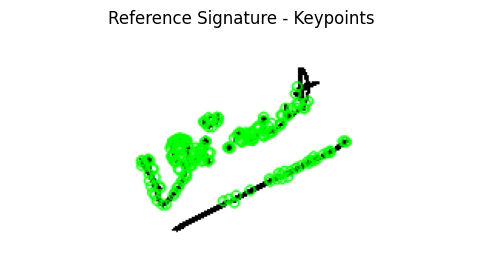

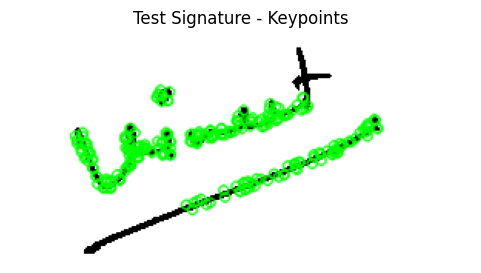

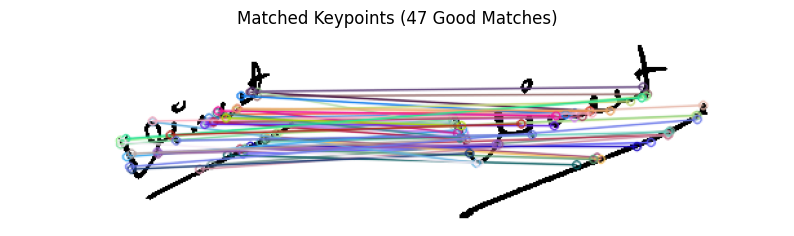

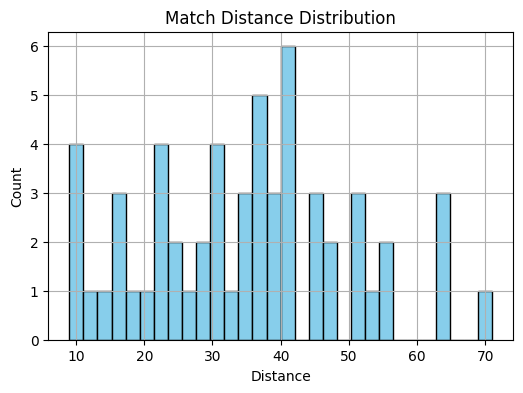

C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


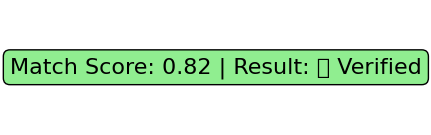

True

In [11]:
# Example usage
ref_signature = "ref2.png"
test_signature = "test2.png"
verify_signature(ref_signature, test_signature)